<a href="https://colab.research.google.com/github/Jason-Gitau/freecodecamp-LangGraph-for-beginners/blob/main/LangGraph_lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# conditional graphs

In [ ]:
from typing import  TypedDict

# !pip install langgraph

from langgraph.graph import StateGraph,START,END

In [ ]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    result: int

In [ ]:
def adder(state: AgentState):
  """ this node add 2 numbers"""
  state['result']=state['number1']+state['number2']
  return state

def subtractor(state: AgentState):
  """ this node subtract 2 numbers"""
  state['result']=state['number1']-state['number2']
  return state


def decider(state: AgentState):
  """ this node decide which operation to perform"""
  if state['operation']=='+':
    return "additional operation"
  elif state['operation']=='-':
    return "subtraction operation"
  else:
    return "no operation"

In [ ]:
graph=StateGraph(AgentState)

graph.add_node('router',lambda state:state)  #pass through function
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decider,
    {
        # edge node
        "additional operation":"add_node",
        "subtraction operation":"subtract_node"
    }
)

graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

app=graph.compile()

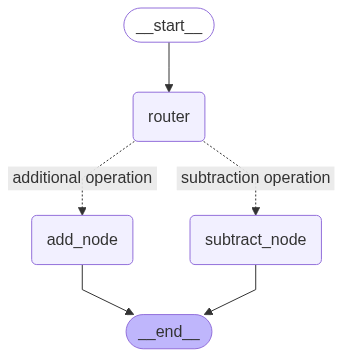

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initial_state_1=AgentState(number1=10,number2=5,operation='+')
print(app.invoke(initial_state_1))
initial_state_2=AgentState(number1=10,number2=5,operation='-')
print(app.invoke(initial_state_2))

{'number1': 10, 'operation': '+', 'number2': 5, 'result': 15}
{'number1': 10, 'operation': '-', 'number2': 5, 'result': 5}
